In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#to load file and display the head
df=pd.read_csv('heart_dis.csv')
df.head()

,age,gender,cp,rbp,chol,fbs,rstg,mhr,exang,oldpeak,slope,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [ ]:
#to show attributes, number of rows and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   gender   303 non-null    int64  
 2   cp       303 non-null    int64  
 3   rbp      303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   rstg     303 non-null    int64  
 7   mhr      303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  target   303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [ ]:
#data statistics
df.describe()

,age,gender,cp,rbp,chol,fbs,rstg,mhr,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
#to show the frequency of each class
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

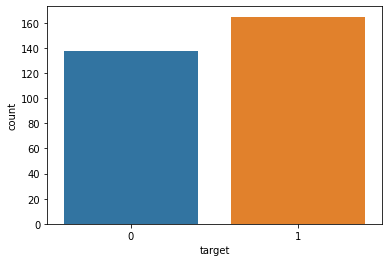

In [ ]:
sns.countplot(data=df,x='target')

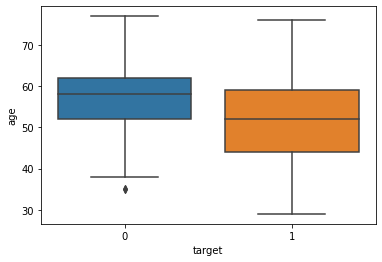

In [ ]:
#the boxplot that shows that older persons are more likely to suffer heart disease
sns.boxplot(x='target', y='age', data=df)

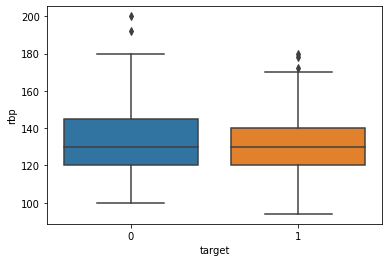

In [ ]:
#boxplot that shows that persons with rbp are more likely to suffer heart disease
sns.boxplot(x='target',y='rbp',data=df)

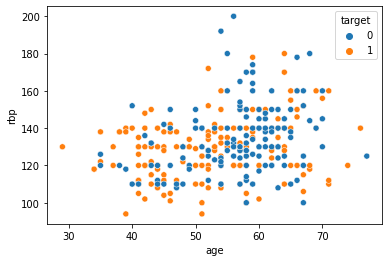

In [ ]:
#scatter plot for rbp versus age grouped by target
sns.scatterplot(x='age', y='rbp',data=df,hue='target')

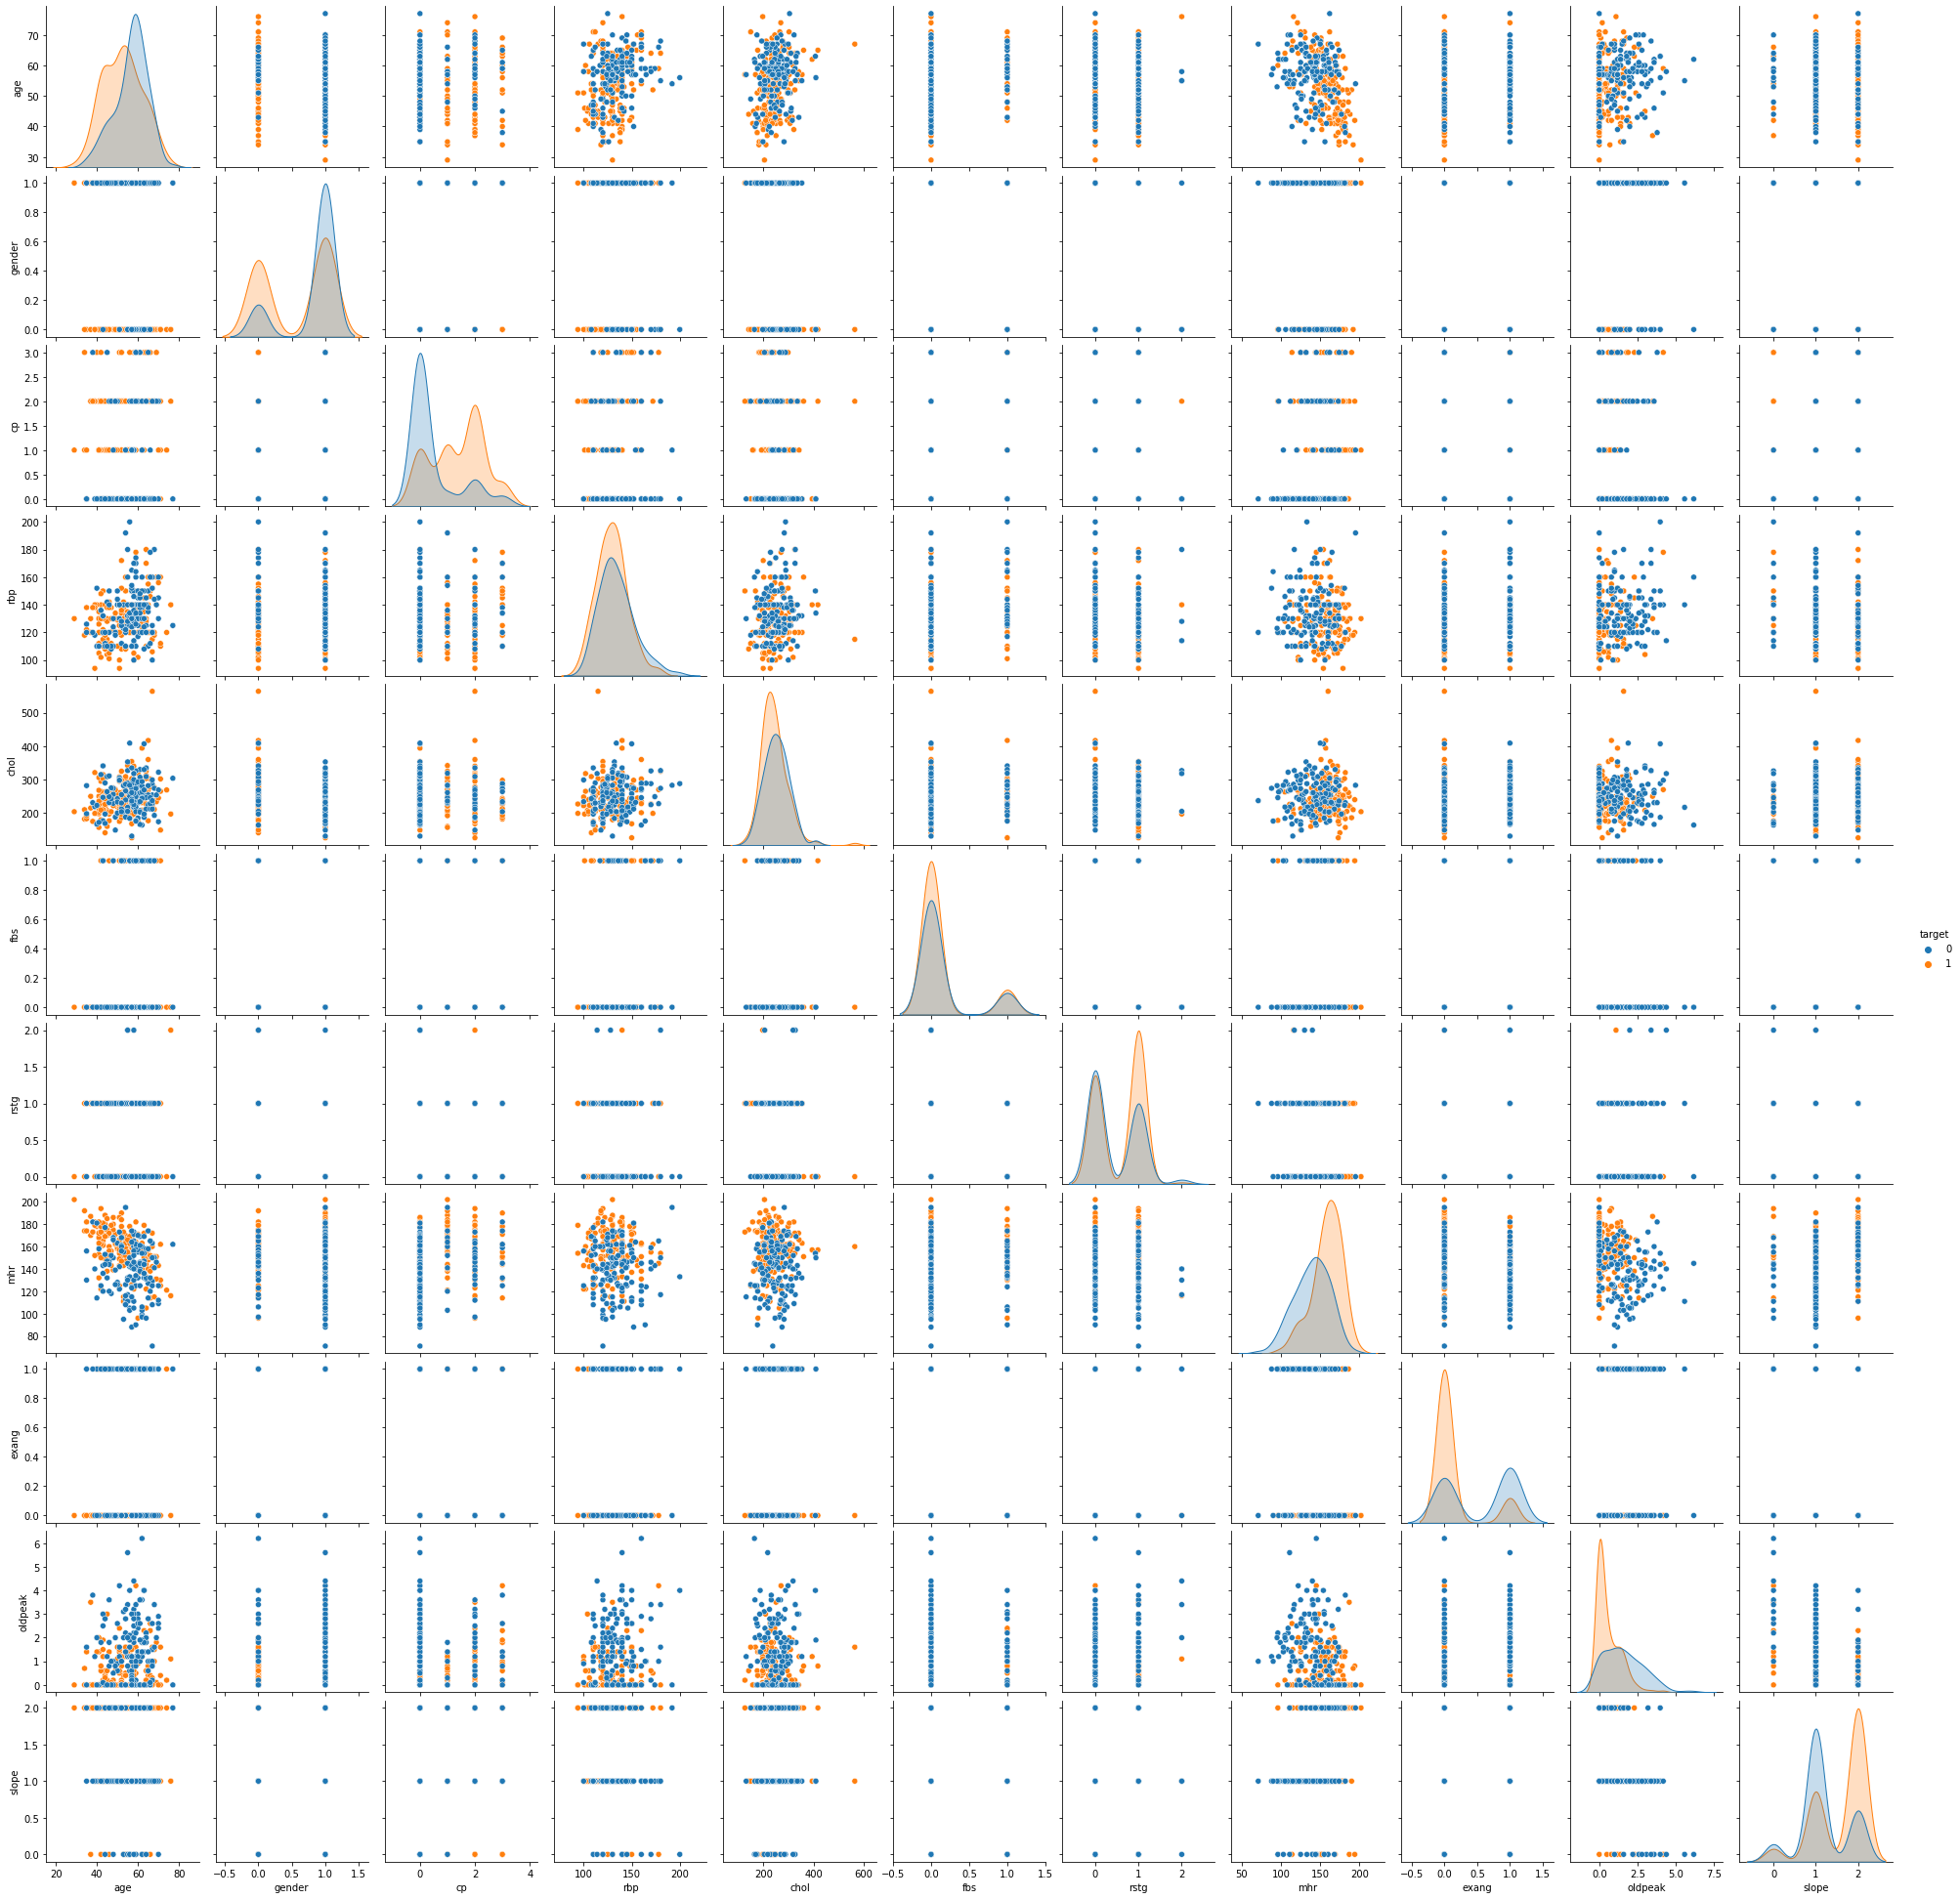

In [ ]:
sns.pairplot(df,hue='target')

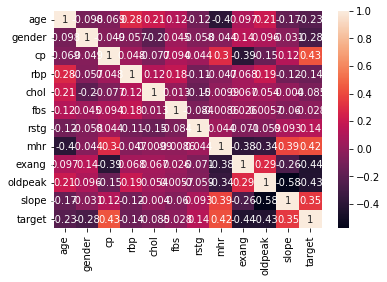

In [ ]:
#correlation matrix
sns.heatmap(df.corr(), annot=True)

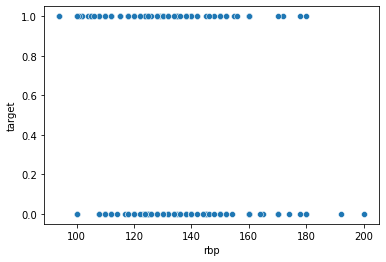

In [ ]:
#scatterplot of rbp against the target
sns.scatterplot(x='rbp',y='target',data=df)

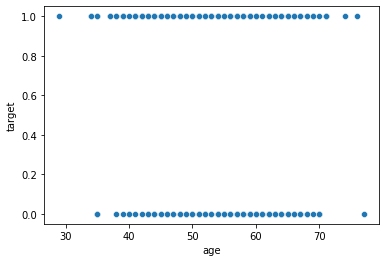

In [ ]:
#scatterplot of age against the target
sns.scatterplot(x='age',y='target',data=df)

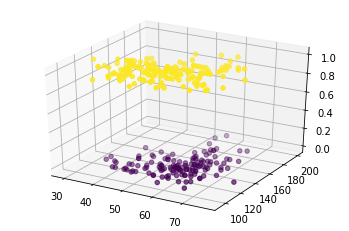

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['rbp'],df['target'],c=df['target'])

In [ ]:
#to separate x and y
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
#import libraries for data plot and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Split the data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
#to create a scalar instance
scaler = StandardScaler()

In [ ]:
#to fit and transform the scaler
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
#Logistic Regression Model
#to import the logistic regression model class
from sklearn.linear_model import LogisticRegression

In [ ]:
#to create instance from the class
log_model = LogisticRegression()

In [ ]:
#to fit the model
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [ ]:
#to print the coefficients for age and rbp
log_model.coef_

array([[-0.23632989, -0.87504588,  1.06371751, -0.371158  , -0.08098973,
         0.00502422,  0.35338693,  0.66549413, -0.29521786, -0.81086786,
        -0.02984603]])

This means that we can expect the odds of having a heart disease to increase (the original coefficient is negative) per unit increase in age and rbp

In [ ]:
#to evaluate model
#import methods for the evaluation matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
#to predict the classes of the test dataset instances
y_pred = log_model.predict(scaled_X_test)

In [ ]:
#to evaluate accuracy
accuracy_score(y_test,y_pred)

0.8021978021978022

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[34, 11],
       [ 7, 39]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


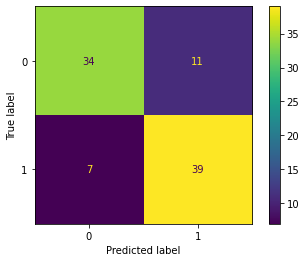

In [ ]:
#plot the confusion matrix
plot_confusion_matrix(log_model, scaled_X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


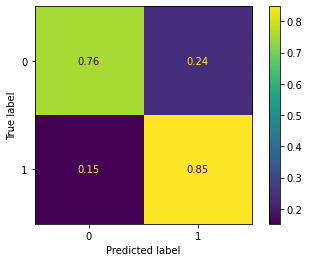

In [ ]:
#to scale to the highest value=1
plot_confusion_matrix(log_model, scaled_X_test, y_test, normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        45
           1       0.78      0.85      0.81        46

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [ ]:
X_train.iloc[0]

age         56.0
gender       1.0
cp           2.0
rbp        130.0
chol       256.0
fbs          1.0
rstg         0.0
mhr        142.0
exang        1.0
oldpeak      0.6
slope        1.0
Name: 170, dtype: float64

In [ ]:
y_train.iloc[0]

0

In [ ]:
#0% probability of 0 class
#100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1,-1))

array([[2.21549895e-06, 9.99997785e-01]])

In [ ]:
log_model.predict(X_train.iloc[0].values.reshape(1,-1))

array([1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


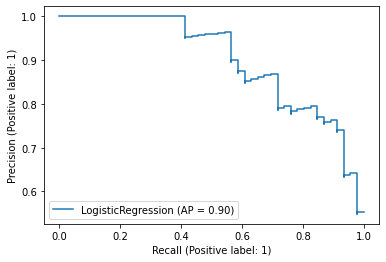

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


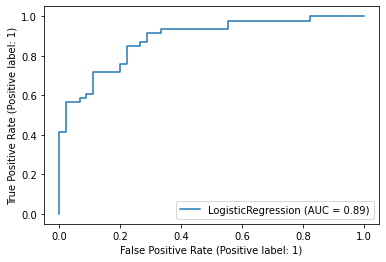

In [ ]:
plot_roc_curve(log_model, scaled_X_test, y_test)

In [ ]:
#to predict for new patients data
newdata=pd.read_csv('new_patients.csv')
newdata.head()

,age,gender,cp,rbp,chol,fbs,rstg,mhr,exang,oldpeak,slope
0,56,1,1,120,240,0,1,169,0,0.0,0
1,55,0,1,132,342,0,1,166,0,1.2,2
2,41,1,1,120,157,0,1,182,0,0.0,2
3,38,1,2,138,175,0,1,173,0,0.0,2
4,38,1,2,138,175,0,1,173,0,0.0,2


In [ ]:
#to scale and transform new data train
scaled_newdata_train = scaler.fit_transform(newdata)

In [ ]:
#to compute probability of data train
y_prob2 = log_model.predict_proba(scaled_newdata_train)
y_prob2

array([[0.07898509, 0.92101491],
       [0.03819373, 0.96180627],
       [0.0378252 , 0.9621748 ],
       [0.02204829, 0.97795171],
       [0.02204829, 0.97795171],
       [0.99076591, 0.00923409],
       [0.96664043, 0.03335957],
       [0.67756661, 0.32243339],
       [0.84369379, 0.15630621],
       [0.95722879, 0.04277121]])

In [ ]:
#to predict newdata train
y_pred2 = log_model.predict(scaled_newdata_train)
y_pred2

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
scaled_newdata_test = scaler.transform(newdata)

In [ ]:
y_prob3 = log_model.predict_proba(scaled_newdata_test)
y_prob3

array([[0.07898509, 0.92101491],
       [0.03819373, 0.96180627],
       [0.0378252 , 0.9621748 ],
       [0.02204829, 0.97795171],
       [0.02204829, 0.97795171],
       [0.99076591, 0.00923409],
       [0.96664043, 0.03335957],
       [0.67756661, 0.32243339],
       [0.84369379, 0.15630621],
       [0.95722879, 0.04277121]])

In [ ]:
y_pred3 = log_model.predict(scaled_newdata_test)
y_pred3

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])